In [23]:
import torch
import numpy as np
from torch.autograd import Variable
import matplotlib.pyplot as plt
from IPython import display


In [25]:
X_1 = np.array([[0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0 ]])
X_2 = np.flip(X_1, axis=1).copy()
a = np.array(([[8.07131, 1730.63, 233.426], [7.43155, 1554.679, 240.337]]))
T=20
pw = 10 ** (a[0, 0] - a[0, 1] / (T + a[0, 2]))
pd = 10 ** (a[1, 0] - a[1, 1] / (T + a[1, 2]))
P = np.array([[28.1, 34.4, 36.7, 36.9, 36.8, 36.7, 36.5, 35.4, 32.9, 27.7, 17.5]])
P = torch.tensor(P, requires_grad=False, dtype=torch.float32)

A = Variable(torch.tensor([1.0, 1.0]), requires_grad=True)

X_1 = torch.tensor(X_1, requires_grad=False, dtype=torch.float32)
X_2 = torch.tensor(X_2, requires_grad=False, dtype=torch.float32)

a= 0.001

for i in range(100):
  Pred = X_1 * torch.exp(A[0] * (A[1] * X_2 / (A[0] * X_1 + A[1] *X_2)) ** 2) * pw + \
      X_2 * torch.exp(A[1] * (A[0] * X_1 / (A[0] * X_1 + A[1] *X_2)) ** 2) * pd
  
  l_s = (Pred - P) ** 2
  l_s = l_s.sum()

  l_s.backward()

  with torch.no_grad():
    A -= a * A.grad

    A.grad.zero_()

print('Estimated A12 A21',A)
print('final Loss',l_s.data.numpy())




Estimated A12 A21 tensor([1.9584, 1.6892], requires_grad=True)
final Loss 0.67019325


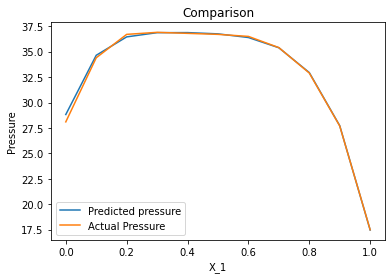

In [21]:

Pred = Pred.detach().numpy()[0]
P = P.detach().numpy()[0]
X_1 = X_1.detach().numpy()[0]

plt.plot(X_1, Pred, label='Predicted pressure')
plt.plot(X_1, P, label='Actual Pressure')
plt.xlabel('X1')
plt.ylabel('Pressure')
plt.legend()
plt.title("Comparison")
plt.show()
